# Titanic Passenger Survival Prediction - Kaggle

### https://www.kaggle.com/c/titanic/overview

## Importing the Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the TrainSet

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Checking the NULL Values

<AxesSubplot:>

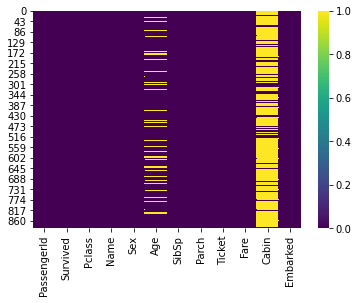

In [4]:
sns.heatmap(train.isnull(),cmap="viridis")

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

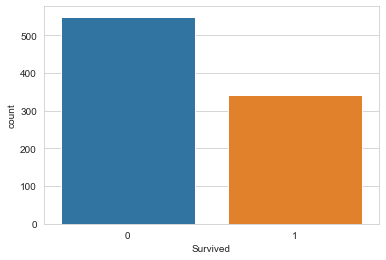

In [5]:
sns.set_style("whitegrid")
sns.countplot("Survived",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

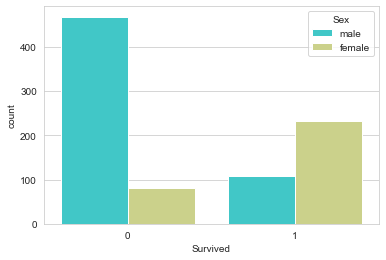

In [6]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Sex",data=train,palette="rainbow")

#### Men lost their lives more as compared to Women

<AxesSubplot:xlabel='Survived', ylabel='count'>

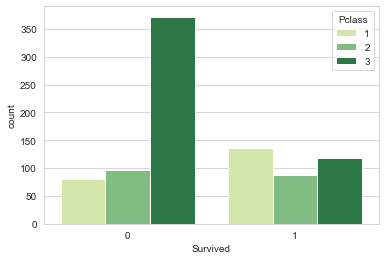

In [7]:
sns.countplot(x="Survived",hue="Pclass",data=train,palette="YlGn") 

 #### Most people from Pclass 3 died

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

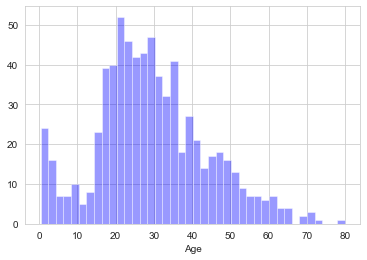

In [8]:
train["Age"].dropna()
sns.distplot(train["Age"],kde=False,bins=40,color="blue")

#### Most people aboard the ship were between the Age 18 - 43

<AxesSubplot:xlabel='SibSp', ylabel='count'>

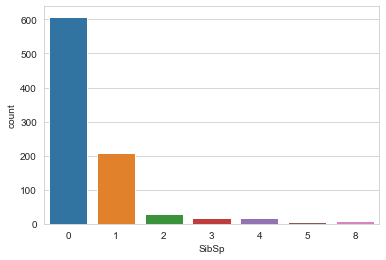

In [9]:
sns.countplot(x="SibSp",data=train)

#### There weren't many siblings or spouses of the people on the ship

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

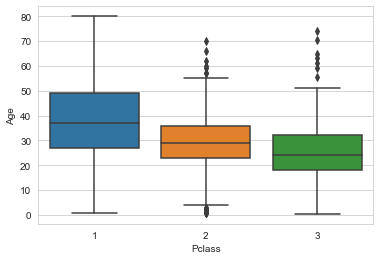

In [10]:
sns.boxplot(x="Pclass",y="Age",data=train)

##### We can impute the Missing values for the Pclasses from the above mentioned Boxplot Taking the mean into consideration and then replacing the missing values with the mean of the ages of the respective Pclasses

### Imputing the Missing Age values and then Applying the function 

In [11]:
def put_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if Pclass==1:
        return 38
    elif Pclass==2:
        return 29
    elif Pclass == 3:
        return 24
    else:
        return Age

In [12]:
train["Age"]=train[["Age","Pclass"]].apply(put_age,axis=1)

### Checking the remaining Null Values

<AxesSubplot:>

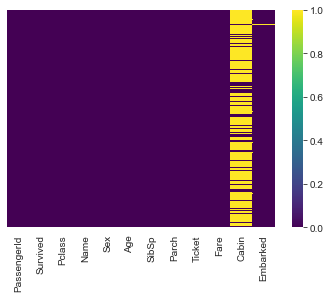

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

 ##### Since most of the Values in the Feature Cabin are missing we can't really make out what the pattern would be to imoute those missing values and more importantly more than 80% of the values are missing so prefereably we should be dropping the column.

In [14]:
train.drop("Cabin",axis=1,inplace=True)

### Checking for any more missing values 

<AxesSubplot:>

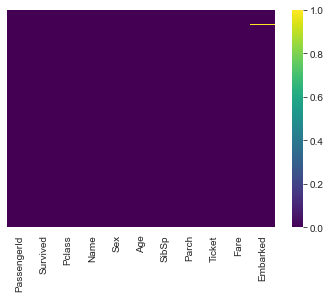

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

### Performing One Hot Encoding for the Embarked Feature and the Gender Feature to convert categorical features to Numerical Values

In [16]:
pd.get_dummies(train['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [17]:
sex=pd.get_dummies(train["Sex"],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

### Dropping the Irrelevent features 

In [18]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [19]:
train=pd.concat([train,sex,embark],axis=1)

In [20]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Splitting the data into Input features(x) and Output Features(y)

In [21]:
x_train,y_train=(train.drop('Survived',axis=1),train['Survived'])

### Loading the Test Data Set

In [22]:
test=pd.read_csv("test.csv")

### Cleaning out the test data by Imputing the Age Missing values

<AxesSubplot:>

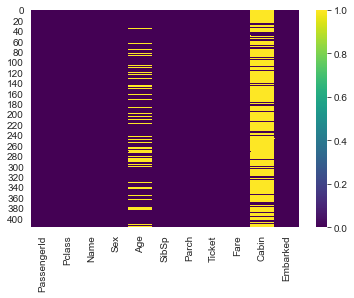

In [23]:
sns.heatmap(test.isnull(),cmap="viridis")

In [24]:
def put_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if Pclass==1:
        return 38
    elif Pclass==2:
        return 29
    elif Pclass == 3:
        return 24
    else:
        return Age

In [25]:
test.drop("Cabin",axis=1,inplace=True)

In [26]:
test["Age"]=test[["Age","Pclass"]].apply(put_age,axis=1)

<AxesSubplot:>

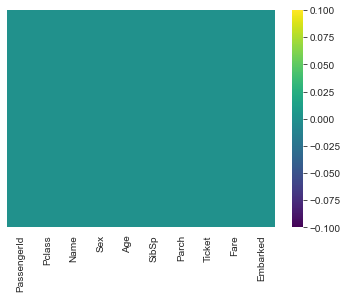

In [27]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')

### Exploring the Data w.r.to Fare

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

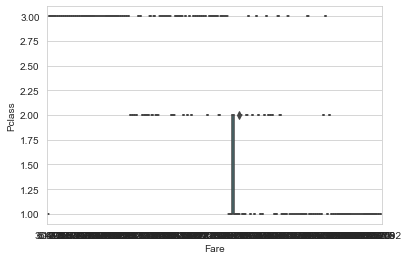

In [28]:
sns.boxplot(data=test,x='Fare',y='Pclass')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

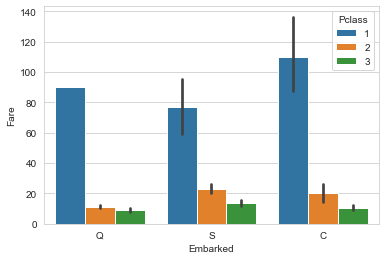

In [29]:
sns.barplot(x="Embarked",y="Fare",hue="Pclass",data=test)

### Imputing the Missing Fare values 

In [30]:
def get_fare(rakkam):
    Fare=rakkam[0]
    Embarked= rakkam[1]
    Pclass= rakkam[2]    
    
    
    if Pclass==3 and Embarked == S:
        Fare=12
        return Fare
    elif Pclass==3 and Embarked == Q:
        Fare=7
        return Fare
    elif Pclass==3 and Embarked == C:
        Fare=9
        return Fare
    elif Pclass==2 and Embarked == S:
        Fare=21
        return Fare
    elif Pclass==2 and Embarked == Q:
        Fare=13
        return Fare
    elif Pclass==2 and Embarked == C:
        Fare=18
        return Fare
    elif Pclass==1 and Embarked == S:
        Fare=76
        return Fare
    elif Pclass==1 and Embarked == Q:
        Fare=91
        return Fare
    elif Pclass==1 and Embarked == C:
        Fare=110
        return Fare
    else:
        return Fare

In [31]:
test["Fare"]=test[["Fare","Pclass","Embarked"]].apply(get_fare,axis=1)

<AxesSubplot:>

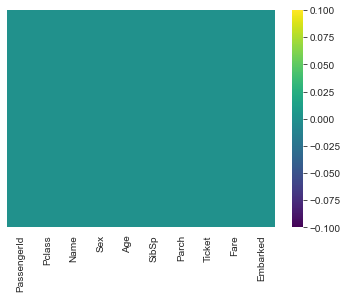

In [32]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')

### Performing the One Hot Encoding on the Features

In [33]:
pd.get_dummies(test['Embarked'],drop_first=True)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [34]:
sex=pd.get_dummies(test["Sex"],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)

### Dropping the Irrelevent Data

In [35]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [36]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,24,0,0,7.8292
1,893,3,24,1,0,7.0000
2,894,2,29,0,0,9.6875
3,895,3,24,0,0,8.6625
4,896,3,24,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,24,0,0,8.0500
414,1306,1,38,0,0,108.9000
415,1307,3,24,0,0,7.2500
416,1308,3,24,0,0,8.0500


In [37]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
test=pd.concat([test,sex,embark],axis=1)

In [39]:
x_train,y_train=(train.drop('Survived',axis=1),train['Survived'])

### Importing the Logistic Regression Algorithm

In [40]:
from sklearn.linear_model import LogisticRegression

### Fitting the Data

In [41]:
model=LogisticRegression(max_iter=4000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=4000)

### Making Predictions

In [42]:
predictions=model.predict(test)

In [43]:
accuracy = model.score(x_train, y_train)

In [44]:
accuracy

0.7957351290684624

### Exporting the Final Results to the CSV File 

In [45]:
results = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})

In [46]:
results.to_csv('Titanic_preds.csv',index=False)